In [1]:
import pandas as pd
from nltk.metrics import edit_distance, binary_distance
from pyphonetics import Soundex
import string
import numpy as np
import ast
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tt_dataset.csv')
df

,text,phonemes,soundex
0,Peter Piper picked a peck of pickled peppers. ...,"[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', '...","['P360', 'P160', 'P230', 'A000', 'P200', 'O100..."
1,I saw Susie sitting in a shoe shine shop. Wher...,"[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0...","['I000', 'S000', 'S200', 'S352', 'I500', 'A000..."
2,How many boards Could the Mongols hoard If the...,"[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B'...","['H000', 'M500', 'B632', 'C430', 'T000', 'M524..."
3,How can a clam cram in a clean cream can?,"[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], ['...","['H000', 'C500', 'A000', 'C450', 'C650', 'I500..."
4,Send toast to ten tense stout saints' ten tall...,"[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T'...","['S530', 'T230', 'T000', 'T500', 'T520', 'S330..."
...,...,...,...
2671,Then step up mister and twist your tongue,"[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], [...","['T500', 'S310', 'U100', 'M236', 'A530', 'T230..."
2672,Now Kissle will whistle at busty Miss. Russell...,"[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'], ...","['N000', 'K240', 'W400', 'W234', 'A300', 'B230..."
2673,"Purple paper people, purple paper people, purp...","[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', '...","['P614', 'P160', 'P140', 'P614', 'P160', 'P140..."
2674,De doorgaans dappere Durgerdammer drukker Dirk...,"[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', '...","['D000', 'D625', 'D160', 'D626', 'D626', 'D620..."


## implement metrics

### for text

In [3]:
### necessary functions

# remove all punctuation from a string
def remove_punctuation(input_string):
    punctuation_chars = string.punctuation # Create a string containing all punctuation marks
    no_punct = ''.join(char for char in input_string if char not in punctuation_chars) # Create new string without punctuation
    
    return no_punct



In [4]:
# calculates levenshtein dist between every two words in a string
# args: input string, boolean of allowing transpositions
def text_levenshtein_dist_matrix(tongue_twister, transp):
    words = remove_punctuation(tongue_twister).split(' ') # split tt into indiv words
    levenshtein_arr = np.zeros((len(words), len(words))) # initialise distance array
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            dist = edit_distance(words[i], words[j], substitution_cost=1, transpositions=transp) # Transposition True because of difficulty to distinguish both words
            levenshtein_arr[i, j] = dist
            levenshtein_arr[j, i] = dist
            
    return levenshtein_arr


# calculates binary dist between every two words in a string
# args: input string
def text_binary_dist_matrix(tongue_twister):
    words = remove_punctuation(tongue_twister).split(' ') # split tt into indiv words
    binary_dist_arr = np.zeros((len(words), len(words))) # initialise distance array
    for i in range(len(words)):
        for j in range(i, len(words)):
            dist = binary_distance(words[i], words[j]) 
            binary_dist_arr[i, j] = dist
            binary_dist_arr[j, i] = dist
            
    return binary_dist_arr

### for phonemes

In [5]:
### notwendige Funktionen

# Nimmt zwei Listen mit Phonemen (, die je ein Wort darstellen) und gibt den Levenshtein-Abstand zwischen den Phonemlisten zurück
def phoneme_levenshtein_dist(ph_list1, ph_list2):
    len_str1 = len(ph_list1) + 1
    len_str2 = len(ph_list2) + 1
    matrix = [[0] * len_str2 for _ in range(len_str1)] # Erstellung der Matrix, in der die Abstände gespeichert werden
    # Erste Zeile und Spalte füllen
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j
    # Restliche Matrix füllen
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if ph_list1[i - 1] == ph_list2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,      # Löschen
                matrix[i][j - 1] + 1,      # Einfügen
                matrix[i - 1][j - 1] + cost  # Ersetzen
            )

    # letzten Matrixwert mit Levenshtein-Abstand ausgeben
    return matrix[-1][-1]


In [6]:

def phoneme_levenshtein_dist_matrix(tt_phonemes):
    levenshtein_arr = np.zeros((len(tt_phonemes), len(tt_phonemes))) # initialise distance array
    for i in range(len(tt_phonemes)):
        for j in range(i+1, len(tt_phonemes)):
            dist = phoneme_levenshtein_dist(tt_phonemes[i], tt_phonemes[j])
            levenshtein_arr[i, j] = dist
            levenshtein_arr[j, i] = dist
            
    return levenshtein_arr


# berechnet Gleichheit von Phonemlisten paarweise
# args: Liste mit Phonemlisten
def phoneme_binary_dist_matrix(ph_list):
    binary_dist_arr = np.zeros((len(ph_list), len(ph_list))) # initialise distance array
    for i in range(len(ph_list)):
        for j in range(i, len(ph_list)):
            if ph_list[i] != ph_list[j]:
                binary_dist_arr[i, j] = 1
                binary_dist_arr[j, i] = 1
            
    return binary_dist_arr


### for soundex

In [7]:


# berechnet Levenshtein-Abstand zwischen Soundex-Repräsentationen paarweise
# args: Liste mit Soundex-Repräsentationen
def soundex_levenshtein_dist_matrix(soundex_list):
    levenshtein_arr = np.zeros((len(soundex_list), len(soundex_list))) # initialise distance array
    for i in range(len(soundex_list)):
        for j in range(i+1, len(soundex_list)):
            dist = edit_distance(soundex_list[i], soundex_list[j], substitution_cost=1, transpositions=False)
            levenshtein_arr[i, j] = dist
            levenshtein_arr[j, i] = dist
            
    return levenshtein_arr




# berechnet Gleichheit von Soundex-Repräsentationen paarweise
# args: Liste mit Soundex-Repräsentationen
def soundex_binary_dist_matrix(sx_list):
    binary_dist_arr = np.zeros((len(sx_list), len(sx_list))) # initialise distance array
    for i in range(len(sx_list)):
        for j in range(i, len(sx_list)):
            if sx_list[i] != sx_list[j]:
                binary_dist_arr[i, j] = 1
                binary_dist_arr[j, i] = 1
            
    return binary_dist_arr

### Anwendung der Abstände

#### erste beispielhafte Tests

In [8]:
test_text = df['text'][16]
test_phonemes = ast.literal_eval(df['phonemes'][15])
test_soundex = ast.literal_eval(df['soundex'][15])

print(test_text)
print(text_levenshtein_dist_matrix(test_text, False), '\n', text_binary_dist_matrix(test_text))
print(test_phonemes)
print(phoneme_levenshtein_dist_matrix(test_phonemes), '\n', phoneme_binary_dist_matrix(test_phonemes))
print(test_soundex)
print(soundex_levenshtein_dist_matrix(test_soundex), '\n', soundex_binary_dist_matrix(test_soundex))

I wish to wish the wish you wish to wish, but if you wish the wish the witch wishes, I won't wish the wish you wish to wish.
[[0. 4. 2. 4. 3. 4. 3. 4. 2. 4. 3. 2. 3. 4. 3. 4. 3. 5. 6. 0. 4. 4. 3. 4.
  3. 4. 2. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [2. 4. 0. 4. 2. 4. 2. 4. 0. 4. 3. 2. 2. 4. 2. 4. 2. 4. 6. 2. 3. 4. 2. 4.
  2. 4. 0. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [3. 4. 2. 4. 0. 4. 3. 4. 2. 4. 3. 3. 3. 4. 0. 4. 0. 4. 4. 3. 4. 4. 0. 4.
  3. 4. 2. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [3. 4. 2. 4. 3. 4. 0. 4. 2. 4. 3. 3. 0. 4. 3. 4. 3. 5. 6. 3. 3. 4. 3. 4.
  0. 4. 2. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [2. 4. 0. 4. 2. 4. 2. 4. 0. 4. 3. 2. 2. 4. 2. 4. 2. 4. 6. 2. 3. 4. 2. 4.
  2. 4. 0. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.


#### Datensatzimporte

In [9]:
# Datensets einlesen
sentence = pd.read_csv(r'sentence_dataset.csv',header= 0)
tt = pd.read_csv(r'tt_dataset.csv', delimiter= ',', header= 0)

In [10]:
sentence

,sentence,phonemes,soundex
0,He was accorded a State funeral and was buried...,"[['HH', 'IY1'], ['W', 'AA1', 'Z'], ['AH0', 'K'...","['H000', 'W200', 'A263', 'A000', 'S330', 'F564..."
1,In American English whilst is considered to be...,"[['IH0', 'N'], ['AH0', 'M', 'EH1', 'R', 'AH0',...","['I500', 'A562', 'E524', 'W423', 'I200', 'C523..."
2,Once again she is seen performing on a compute...,"[['W', 'AH1', 'N', 'S'], ['AH0', 'G', 'EH1', '...","['O520', 'A250', 'S000', 'I200', 'S500', 'P616..."
3,Hippety Hopper returns in McKimsons Pop Im Pop.,"[['HH', 'IH1', 'P', 'AH0', 'T', 'IY0'], ['HH',...","['H130', 'H160', 'R365', 'I500', 'M252', 'P100..."
4,Today their programs are available on the Inte...,"[['T', 'AH0', 'D', 'EY1'], ['DH', 'EH1', 'R'],...","['T300', 'T600', 'P626', 'A600', 'A141', 'O500..."
...,...,...,...
101098,Force B Adml.,"[['F', 'AO1', 'R', 'S'], ['B', 'IY1'], [], ['A...","['F620', 'B000', 'A354']"
101099,It has less complex feature than other micropr...,"[['IH1', 'T'], ['HH', 'AE1', 'Z'], ['L', 'EH1'...","['I300', 'H200', 'L200', 'C514', 'F360', 'T500..."
101100,Here his attention was drawn to geology.,"[['HH', 'IY1', 'R'], ['HH', 'IH1', 'Z'], ['AH0...","['H600', 'H200', 'A353', 'W200', 'D650', 'T000..."
101101,Every element of Milnor Ktheory can be written...,"[['EH1', 'V', 'ER0', 'IY0'], ['EH1', 'L', 'AH0...","['E160', 'E455', 'O100', 'M456', 'K360', 'C500..."


#### Abstandshistogramme

##### Berechnung

###### Hilfsfunktionen

In [11]:
# relative Abstandshäufigkeiten pro Satz (Text)
def distance_hist_rel(sentence, input_type):
    # Levenshtein-Abstände als Matrix
    if input_type == 'text':
        distance_matrix = text_levenshtein_dist_matrix(sentence, False) 
    elif input_type == 'phonemes':
        distance_matrix = phoneme_levenshtein_dist_matrix(sentence) 
    elif input_type == 'soundex':
        distance_matrix = phoneme_levenshtein_dist_matrix(sentence)
    else:
        print('FALSE INPUT TYPE. Parameter "input_type" has to be text, phonemes or soundex')
        return False
    distance_matrix[np.tril_indices_from(distance_matrix)] = -1 # linke untere Hälfte inkl. Diagonale auf -1 setzen
    # Histogrammerstellung
    flat_distances = distance_matrix.flatten()
    hist_values, bin_edges = np.histogram(flat_distances, bins=np.arange(0, flat_distances.max() + 1.5) - 0.5, density=True)

    return hist_values

###### Berechnungen für alle drei Repräsentationsformen auf dem Zungenbrecherdatensatz und Kontrolldatensatz

In [19]:
# Histogramme aller Zungenbrecher aufaddieren

tt_sum_hist = [0] # Liste für kummulierte Histogrammwerte für Textversion
tt_hist = [] # Liste für einzelne Histogramme für Textversion
tt_sum_hist_phonemes = [0] # Liste für kummulierte Histogrammwerte für Phonemversion
tt_hist_phonemes = [] # Liste für einzelne Histogramme für Phonemversion
tt_sum_hist_soundex = [0] # Liste für kummulierte Histogrammwerte für Phonemversion
tt_hist_soundex = [] # Liste für einzelne Histogramme für Phonemversion

for i in range(tt['text'].shape[0]):

    # Einzelhistogramme berechnen
    text_hist = distance_hist_rel(tt['text'].iloc[i], 'text')
    tt_hist.append(text_hist)
    text_hist_phonemes = distance_hist_rel(tt['text'].iloc[i], 'phonemes')
    tt_hist_phonemes.append(text_hist_phonemes)
    text_hist_soundex = distance_hist_rel(tt['text'].iloc[i], 'soundex')
    tt_hist_soundex.append(text_hist_soundex)

    # zu kummulierten Histogrammen addieren
    # für Text
    for j in range(text_hist.shape[0]): 
        if (j+1)>len(tt_sum_hist): # falls notwendig Gesamthistogramm erweitern
            tt_sum_hist += [0]*(j+1-len(tt_sum_hist))
        tt_sum_hist[j] += text_hist[j] # Aufaddieren
    # für Phoneme
    for j in range(text_hist_phonemes.shape[0]): 
        if (j+1)>len(tt_sum_hist_phonemes): # falls notwendig Gesamthistogramm erweitern
            tt_sum_hist_phonemes += [0]*(j+1-len(tt_sum_hist_phonemes))
        tt_sum_hist_phonemes[j] += text_hist_phonemes[j] # Aufaddieren
    # für Soundex
    for j in range(text_hist_soundex.shape[0]): 
        if (j+1)>len(tt_sum_hist_soundex): # Gesamthistogramm verlängern
            tt_sum_hist_soundex += [0]*(j+1-len(tt_sum_hist_soundex))
        tt_sum_hist_soundex[j] += text_hist_soundex[j] # Aufaddieren

# kummulierte Histogrammwerte normalisieren
tt_sum_hist = list(map(lambda x: x/tt.shape[0], tt_sum_hist))
tt_sum_hist_phonemes = list(map(lambda x: x/tt.shape[0], tt_sum_hist_phonemes))
tt_sum_hist_soundex = list(map(lambda x: x/tt.shape[0], tt_sum_hist_soundex))

In [13]:
print(tt_sum_hist)

[0.029194577279179155, 0.02547823008758445, 0.0640947341570248, 0.15373344856295404, 0.21020525289818084, 0.2009465536466151, 0.14092389708198894, 0.08638630947790624, 0.04589499107658522, 0.021267740655710764, 0.01093005208538631, 0.00506809575852363, 0.0016412055022615604, 0.0008057090620862403, 0.0004032812210293691, 0.00013293679432610636, 0.00044261961527519825, 9.848417299403734e-05, 3.537000082508933e-05, 1.8949806894985423e-05, 4.3156391030183356e-05, 0.0, 0.0, 0.0, 2.042033211628154e-07, 0.0, 0.0, 0.0, 5.309286350233201e-06, 4.90087970790757e-06, 1.8378298904653387e-06]


In [20]:
# Histogramme aller Sätze aufaddieren. Analog zum Zungenbrecherdatensatz

sentence_sum_hist = [0]
sentence_hist = []
sentence_sum_hist_phonemes = [0]
sentence_hist_phonemes = []
sentence_sum_hist_soundex = [0]
sentence_hist_soundex = []
for i in range(sentence['sentence'].shape[0]):
    # Einzelhistogramme berechnen
    text_hist = distance_hist_rel(sentence['sentence'].iloc[i], 'text')
    sentence_hist.append(text_hist)
    text_hist_phonemes = distance_hist_rel(sentence['sentence'].iloc[i], 'phonemes')
    sentence_hist_phonemes.append(text_hist_phonemes)
    text_hist_soundex = distance_hist_rel(sentence['sentence'].iloc[i], 'soundex')
    sentence_hist_soundex.append(text_hist_soundex)
    # zu kummulierten Histogrammen addieren
    # für Text
    for j in range(text_hist.shape[0]):
        if (j+1)>len(sentence_sum_hist): # Gesamthistogramm verlängern
            sentence_sum_hist += [0]*(j+1-len(sentence_sum_hist))
        sentence_sum_hist[j] += text_hist[j] # Aufaddieren
    # für Phoneme
    for j in range(text_hist_phonemes.shape[0]):
        if (j+1)>len(sentence_sum_hist_phonemes): # Gesamthistogramm verlängern
            sentence_sum_hist_phonemes += [0]*(j+1-len(sentence_sum_hist_phonemes))
        sentence_sum_hist_phonemes[j] += text_hist_phonemes[j] # Aufaddieren
    # für Text
    for j in range(text_hist_soundex.shape[0]):
        if (j+1)>len(sentence_sum_hist_soundex): # Gesamthistogramm verlängern
            sentence_sum_hist_soundex += [0]*(j+1-len(sentence_sum_hist_soundex))
        sentence_sum_hist_soundex[j] += text_hist_soundex[j] # Aufaddieren

# kummulierte Histogrammwerte normalisieren
sentence_sum_hist = list(map(lambda x: x/sentence.shape[0], sentence_sum_hist))
sentence_sum_hist_phonemes = list(map(lambda x: x/sentence.shape[0], sentence_sum_hist_phonemes))
sentence_sum_hist_soundex = list(map(lambda x: x/sentence.shape[0], sentence_sum_hist_soundex))

print(sentence_sum_hist)

[0.005296090237496574, 0.010890057290578445, 0.05976035264918764, 0.1396782294603446, 0.1698663901303415, 0.1620675949777508, 0.1461198544887206, 0.1206751332002198, 0.0815608241176564, 0.05022849361348395, 0.027637949318138653, 0.014410364083952725, 0.006742282953183033, 0.00274369680441175, 0.0009917416594862672, 0.0004040085263665138, 0.00020329311960422687, 0.00010305159996173378, 6.892345176075622e-05, 3.2351372816047445e-05, 2.0201310964196333e-05, 1.366386191762293e-05, 9.282177467097795e-06, 3.900368874701981e-06, 8.242419446834747e-07, 4.4958651528189527e-07, 0.0, 0.0, 0.0, 4.709953969619855e-07, 1.4129861908859564e-06, 0.0, 1.6013843496707505e-06, 1.3187871114935594e-06, 0.0, 1.3187871114935594e-06]


##### Durchschnitt über gesamte Datensätze

In [ ]:
# Grafeken für welche Repräsentation? text [0], phoneme [1], soundex [2]
r = 1

t_sum_list = [tt_sum_hist, tt_sum_hist_phonemes, tt_sum_hist_soundex]
s_sum_list = [sentence_sum_hist, sentence_sum_hist_phonemes, sentence_sum_hist_soundex]
t_list = [tt_hist, tt_hist_phonemes, tt_hist_soundex]
s_list = [sentence_hist, sentence_hist_phonemes, sentence_hist_soundex]

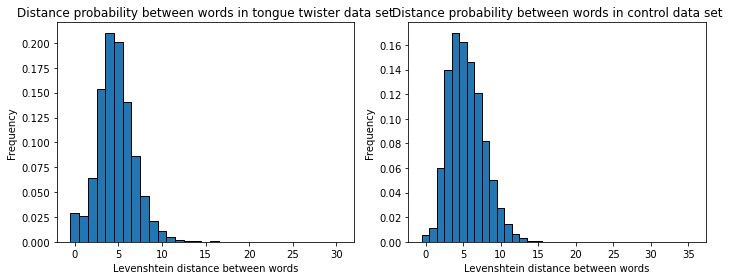

In [15]:
tt_bin_edges = np.arange(0, len(t_sum_list[r])+1)
tt_hist_values = np.array(t_sum_list[r])

sentence_bin_edges = np.arange(0, len(s_sum_list[r])+1)
sentence_hist_values = np.array(s_sum_list[r])

# Subploterstellung (1 Zeile, 2Spalten)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Histogramm für Zungenbrecher
axs[0].bar(tt_bin_edges[:-1], tt_hist_values, width=np.diff(tt_bin_edges), edgecolor='black')
axs[0].set_title('Distance probability between words in tongue twister data set')
axs[0].set_xlabel('Levenshtein distance between words')
axs[0].set_ylabel('Frequency')

# Histogramm für Kontrolldatensatz
axs[1].bar(sentence_bin_edges[:-1], sentence_hist_values, width=np.diff(sentence_bin_edges), edgecolor='black')
axs[1].set_title('Distance probability between words in control data set')
axs[1].set_xlabel('Levenshtein distance between words')
axs[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
diff_sum_hist = t_sum_list[r]
for i in range(len(diff_sum_hist)):
    diff_sum_hist[i] -= s_sum_list[r][i]
print(diff_sum_hist)

[0.02389848704168258, 0.014588172797006006, 0.0043343815078371595, 0.014055219102609429, 0.04033886276783935, 0.03887895866886429, -0.005195957406731677, -0.034288823722313566, -0.03566583304107118, -0.028960752957773186, -0.016707897232752345, -0.009342268325429094, -0.005101077450921473, -0.00193798774232551, -0.0005884604384568981, -0.00027107173204040747, 0.00023932649567097138, -4.56742696769644e-06, -3.3553450935666895e-05, -1.3401565921062022e-05, 2.2955080065987023e-05, -1.366386191762293e-05, -9.282177467097795e-06, -3.900368874701981e-06, -6.200386235206593e-07, -4.4958651528189527e-07, 0.0, 0.0, 5.309286350233201e-06, 4.429884310945584e-06, 4.2484369957938235e-07]


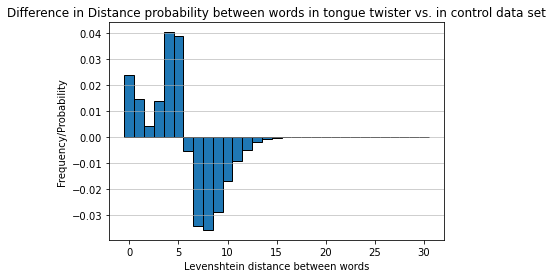

In [17]:
diff_bin_edges = np.arange(0, len(diff_sum_hist)+1)
diff_hist_values = np.array(diff_sum_hist)


plt.bar(diff_bin_edges[:-1], diff_hist_values, width=np.diff(diff_bin_edges), edgecolor='black')
plt.title('Difference in Distance probability between words in tongue twister vs. in control data set')
plt.xlabel('Levenshtein distance between words')
plt.ylabel('Frequency/Probability')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Werte bei 0 und 1 bei Seite: sieht aus, wie zwei Normalverteilungen voneinander abgezoge (ist es ja auch)
- also: gesamte Distance-Verteilung bei Zungenbrechern nach links verschoben -> insgesamt ähnlichere Wörter
- Werte bei 0 und 1: überproportional viele sehr ähnliche und gleiche Wörter in Zungenbrechern

-> bringt das eine Unterscheidbarkeit? Clustering/logistische Regression?

##### gleiche/sehr ähnliche Wörter

In [56]:
tt_0 = []
tt_1 = []
for t in t_list[r]:
    if len(t)>1:
        tt_0.append(t[0])
        tt_1.append(t[1])
s_0 = []
s_1 = []
for t in s_list[r]:
    if len(t)>1:
        s_0.append(t[0])
        s_1.append(t[1])

###### plot

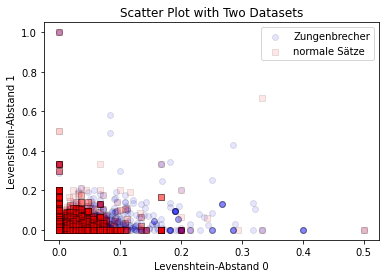

In [57]:


# Create a scatter plot with two datasets
plt.scatter(tt_0, tt_1, marker='o', color='blue', label='Zungenbrecher', edgecolors='black', alpha=0.1)
plt.scatter(s_0, s_1, marker='s', color='red', label='normale Sätze', edgecolors='black', alpha=0.1)

# Set plot labels and title
plt.xlabel('Levenshtein-Abstand 0')
plt.ylabel('Levenshtein-Abstand 1')
plt.title('Scatter Plot with Two Datasets')

# Show a legend
plt.legend()

# Show the plot
plt.show()

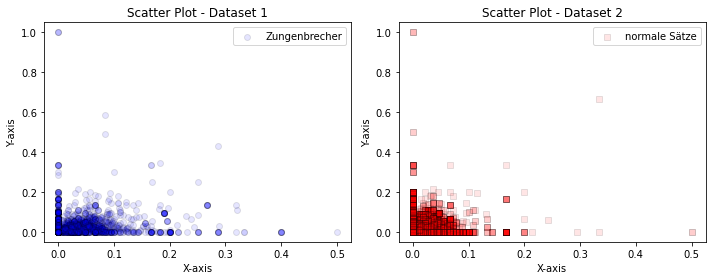

In [58]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjust the figsize as needed

# Scatter plot for Dataset 1
axs[0].scatter(tt_0, tt_1, marker='o', color='blue', label='Zungenbrecher', edgecolors='black', alpha=0.1)
axs[0].set_title('Scatter Plot - Dataset 1')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].legend()

# Scatter plot for Dataset 2
axs[1].scatter(s_0, s_1, marker='s', color='red', label='normale Sätze', edgecolors='black', alpha=0.1)
axs[1].set_title('Scatter Plot - Dataset 2')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

###### histogramme

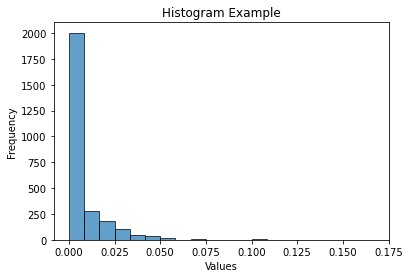

In [55]:
# Create a histogram
plt.hist(s_0, bins=20, edgecolor='black', alpha=0.7)

# Customize plot labels and title
plt.title('Histogram Example')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

- zu nahe aufeinander, reicht nicht für ein Modell.
- weitere Möglichkeiten: mehr als nur Abstand = 0/=1 betrachten
 --> Varianz, Durchschnitt, 

# Notizen


In [18]:
# Fälle: erstes/letztes Phonem

# was sind die beiden häufigsten Ph's am Wortanfang? -> A-Wörter, B-Wörter


